### Data Collection through the NBA.com API:
```https://github.com/swar/nba_api```

### Data Analysis:
- Train on teams from 2022-2023, more if feasible
- Test on teams from 2023-2024

**GET PLAYER STATS by Game for Season**

In [31]:
from nba_api.stats.endpoints import commonteamroster
from nba_api.stats.endpoints import playergamelogs
import pandas as pd
import os

team_dict = {'1610612743': 'nuggets',
             '1610612749': 'bucks', 
             '1610612738': 'celtics', 
             '1610612763': 'grizzlies', 
             '1610612758': 'kings', 
             '1610612755': '76ers', 
             '1610612739': 'cavaliers', 
             '1610612756': 'suns', 
             '1610612746': 'clippers', 
             '1610612752': 'knicks', 
             '1610612744': 'warriors', 
             '1610612751': 'nets', 
             '1610612747': 'lakers', 
             '1610612748': 'heat', 
             '1610612737': 'hawks', 
             '1610612750': 'timberwolves', 
             '1610612740': 'pelicans', 
             '1610612761': 'raptors', 
             '1610612741': 'bulls', 
             '1610612760': 'thunder', 
             '1610612742': 'mavericks', 
             '1610612754': 'pacers', 
             '1610612762': 'jazz', 
             '1610612764': 'wizards', 
             '1610612753': 'magic', 
             '1610612757': 'blazers', 
             '1610612745': 'rockets', 
             '1610612766': 'hornets', 
             '1610612765': 'pistons', 
             '1610612759': 'spurs'
            }

## seasonString: "2022-23"

def getPlayerDataBySeason(seasonString):
    print(f"Gathering {seasonString} season data...")
    for teamId, team in team_dict.items():

        #get active players by team (FUNCTIONAL)
        roster = commonteamroster.CommonTeamRoster(league_id_nullable='00', season=seasonString, team_id=teamId)
        teamPlayerIds = roster.get_data_frames()[0]
        #create directory for each team
        try:  
            os.mkdir(f"{team}Data")  
            print(f"{team}Data directory created successfully ✔")
        except OSError as error:  
            print(error)  

        #iterate through player ids
        print(f"Collecting player data for {team}...")

        for index, row in teamPlayerIds.iterrows():
            print(f"Processing player data for {row['PLAYER']}...")
            playerStats = playergamelogs.PlayerGameLogs(
                player_id_nullable=row['PLAYER_ID'],
                season_nullable=seasonString,
                season_type_nullable='Regular Season'
            )
            playerStats.get_data_frames()[0].to_csv(f"./{team}Data/{row['PLAYER_SLUG']}.csv", index=False)
            print(f"{row['PLAYER_SLUG']}.csv created successfully ✔")
        break

getPlayerDataBySeason('2023-24')

Gathering 2023-24 season data...
nuggetsData directory created successfully ✔
Processing player data for Christian Braun...
christian-braun.csv created successfully ✔
Processing player data for Michael Porter Jr....
michael-porter-jr.csv created successfully ✔
Processing player data for Julian Strawther...
julian-strawther.csv created successfully ✔
Processing player data for Hunter Tyson...
hunter-tyson.csv created successfully ✔
Processing player data for Kentavious Caldwell-Pope...
kentavious-caldwell-pope.csv created successfully ✔
Processing player data for DeAndre Jordan...
deandre-jordan.csv created successfully ✔
Processing player data for Reggie Jackson...
reggie-jackson.csv created successfully ✔
Processing player data for Peyton Watson...
peyton-watson.csv created successfully ✔
Processing player data for Justin Holiday...
justin-holiday.csv created successfully ✔
Processing player data for Braxton Key...
braxton-key.csv created successfully ✔
Processing player data for Niko

### Play by Play Stats

In [28]:
from nba_api.stats.endpoints import playbyplayv3
from nba_api.stats.endpoints import teamgamelog
import re

def convert_to_filename(team_matchup, date_string):
    # Remove non-alphanumeric characters and replace spaces with underscores
    team_matchup = re.sub(r'\W+', '_', team_matchup)
    date_string = re.sub(r'\W+', '_', date_string)

    # Concatenate the formatted strings
    filename = f"{team_matchup}_{date_string}.csv"
    
    return filename


def getPBPDataBySeason(seasonString):
    print(f"Gathering {seasonString} PBP season data...")
    for teamId, team in team_dict.items():
        print(f"Collecting team data for {team}...")
        #create directory for each team
        try:  
            os.mkdir(f"{team}PBPData")  
            print(f"{team}PBPData directory created successfully ✔")
        except OSError as error:  
            print(error)
        #get games by team (FUNCTIONAL)
        gameLog = teamgamelog.TeamGameLog(season=seasonString, season_type_all_star="Regular Season", team_id=teamId).get_data_frames()[0]
        gameLog = gameLog[::-1]
        for index, row in gameLog.iterrows():
            print(f"Collecting PBP data for Game {row['Game_ID']}, {row['MATCHUP']}, {row['GAME_DATE']}")
            filename = f"game{abs(index-81)}.csv"
            #get PBP data for each game
            playbyplayv3.PlayByPlayV3(game_id=row['Game_ID']).get_data_frames()[0].to_csv(f"./{team}PBPData/{filename}", index=False)
            print(f"{filename} created successfully ✔")

        break

getPBPDataBySeason("2022-23")

Gathering 2022-23 PBP season data...
nuggetsPBPData directory created successfully ✔
game0.csv created successfully ✔
game1.csv created successfully ✔
game2.csv created successfully ✔
game3.csv created successfully ✔
game4.csv created successfully ✔
game5.csv created successfully ✔
game6.csv created successfully ✔
game7.csv created successfully ✔
game8.csv created successfully ✔
game9.csv created successfully ✔
game10.csv created successfully ✔
game11.csv created successfully ✔
game12.csv created successfully ✔
game13.csv created successfully ✔
game14.csv created successfully ✔
game15.csv created successfully ✔
game16.csv created successfully ✔
game17.csv created successfully ✔
game18.csv created successfully ✔
game19.csv created successfully ✔
game20.csv created successfully ✔
game21.csv created successfully ✔
game22.csv created successfully ✔
game23.csv created successfully ✔
game24.csv created successfully ✔
game25.csv created successfully ✔
game26.csv created successfully ✔
game27.

3.875


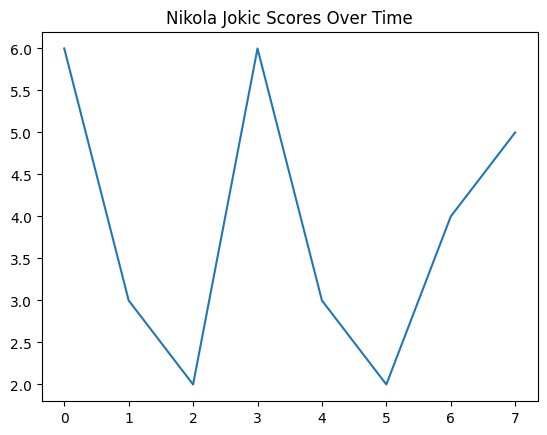

In [56]:
#gameLog = teamgamelog.TeamGameLog(season="2023-24", season_type_all_star="Regular Season", team_id='1610612743').get_data_frames()[0]
#gameLog.to_csv(f"./nuggets23.csv", index=False)
# for index, row in gameLog.iterrows():
#     print(row)
import matplotlib.pyplot as plt

scores = []

agGames = pd.read_csv("./nuggetsData/nikola-jokic.csv")
avg = 0
for index, row in agGames.iterrows():
    pts = row["FG3A"]
    scores.append(pts)
    avg += pts

print(avg/len(agGames))
plt.plot(scores)
plt.title('Nikola Jokic Scores Over Time')
plt.show()